In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airlines_reviews.csv')
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,01-03-2024,Singapore Airlines,TRUE,Flight was amazing. The crew onboard this fl...,Solo Leisure,Dec-23,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,21-02-2024,Singapore Airlines,TRUE,Booking an emergency exit seat still meant h...,Solo Leisure,Feb-24,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,20-02-2024,Singapore Airlines,TRUE,Excellent performance on all fronts. I would...,Family Leisure,Feb-24,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,19-02-2024,Singapore Airlines,TRUE,Pretty comfortable flight considering I was f...,Solo Leisure,Feb-24,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,19-02-2024,Singapore Airlines,TRUE,The service was consistently good from start ...,Family Leisure,Feb-24,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [4]:
df.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

In [5]:
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

# For Data Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer   
from textblob import Word, TextBlob
from wordcloud import WordCloud , STOPWORDS

# For topic modeling
#from sklearn.decomposition import NMF, LatentDirichletAllocation

# For sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
def replace(text):
    text = re.sub(r'[^A-Za-z]+', ' ', str(text))

    return text

In [7]:
df['Reviews'] = df['Reviews'].apply(replace)
df[['Reviews']].head()

,Reviews
0,Flight was amazing The crew onboard this flig...
1,Booking an emergency exit seat still meant hu...
2,Excellent performance on all fronts I would d...
3,Pretty comfortable flight considering I was f...
4,The service was consistently good from start ...


In [8]:
# Converting into small letter
df['Reviews'] = df['Reviews'].str.lower()

In [9]:
# Removing Punctuation
df['Reviews'] = df['Reviews'].str.replace('[^/w/s]', '')

In [10]:
# Removing numberes
df['Reviews'] = df['Reviews'].str.replace('/d', '')

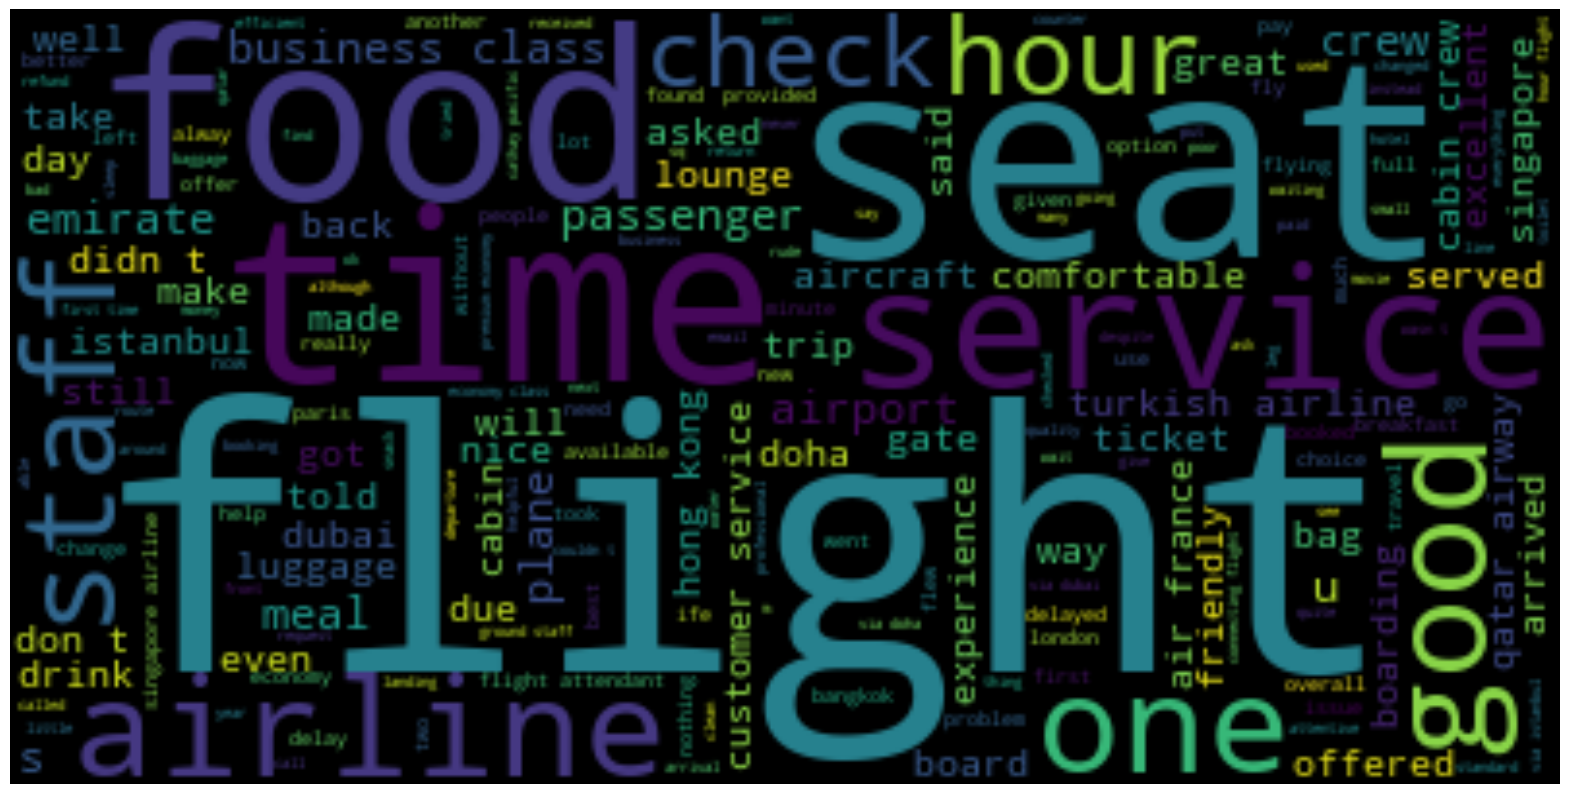

In [11]:
text = ''.join(i for i in df.Reviews)
WordCloud = WordCloud().generate(text)
fig = plt.figure(1, figsize=(20, 12))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
def vaderSentimentanalysis(Reviews):
    vs = analyzer.polarity_scores(Reviews)
    return vs['compound']


df['Sentiments'] = df['Reviews'].apply(vaderSentimentanalysis)


def vader_score(compound):
    if compound >= 0.5:
        return 'positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'


df['Analysis'] = df['Sentiments'].apply(vader_score)
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiments,Analysis
0,Flight was amazing,Alison Soetantyo,01-03-2024,Singapore Airlines,TRUE,flight was amazing the crew onboard this flig...,Solo Leisure,Dec-23,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,0.9755,positive
1,seats on this aircraft are dreadful,Robert Watson,21-02-2024,Singapore Airlines,TRUE,booking an emergency exit seat still meant hu...,Solo Leisure,Feb-24,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,-0.8957,Negative
2,Food was plentiful and tasty,S Han,20-02-2024,Singapore Airlines,TRUE,excellent performance on all fronts i would d...,Family Leisure,Feb-24,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,0.8625,positive
3,“how much food was available,D Laynes,19-02-2024,Singapore Airlines,TRUE,pretty comfortable flight considering i was f...,Solo Leisure,Feb-24,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,0.9605,positive
4,“service was consistently good”,A Othman,19-02-2024,Singapore Airlines,TRUE,the service was consistently good from start ...,Family Leisure,Feb-24,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,0.9501,positive


In [13]:
analysis = df['Analysis'].value_counts()
analysis.head()

Analysis
positive    4532
Negative    2958
Neutral      610
Name: count, dtype: int64

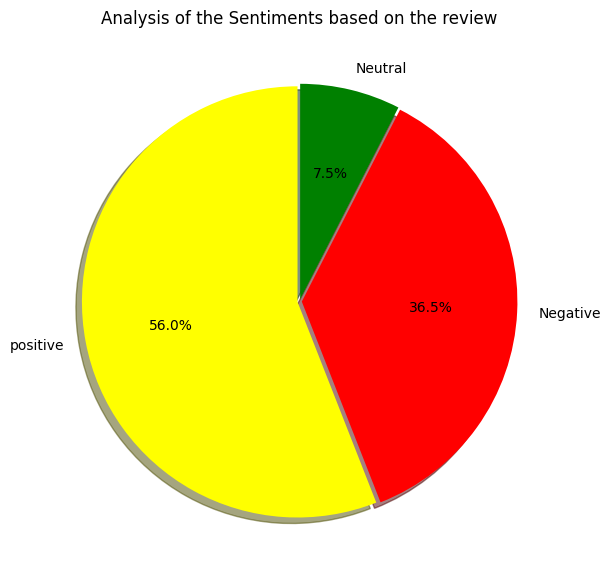

In [14]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 1, 1)
plt.title('Analysis of the Sentiments based on the review')
plt.pie(analysis.values, labels=analysis.index, explode=(0.01, 0.01, 0.01),
        autopct='%1.1f%%', shadow='False', colors=['yellow', 'red', 'green'], startangle=90)
plt.show()

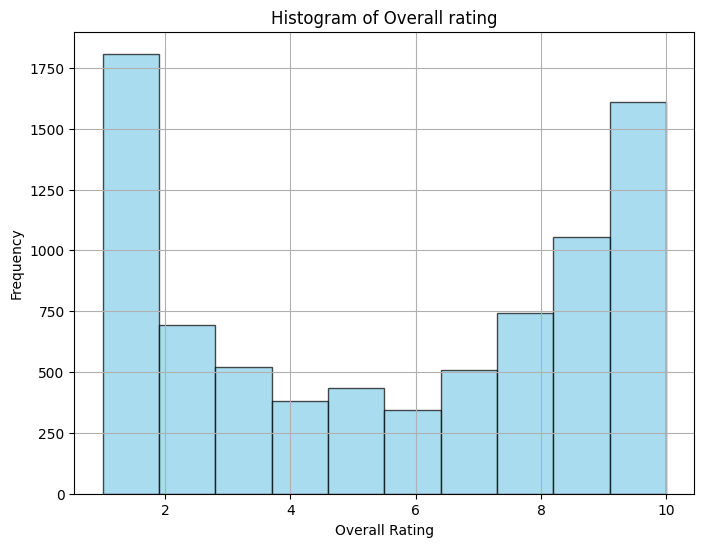

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['Overall Rating'], bins=10,
         color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Overall rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid('True')
plt.show()

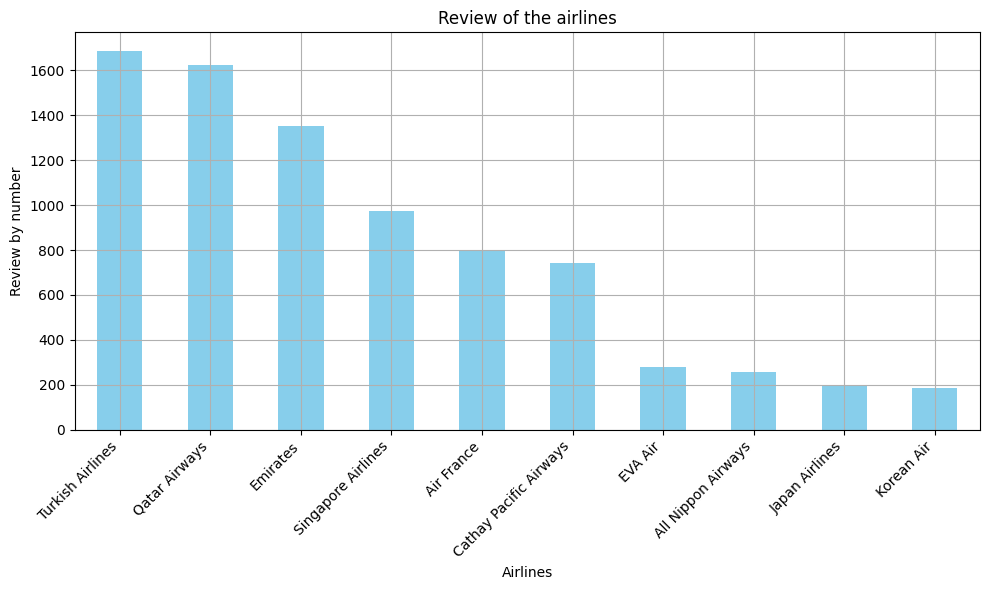

In [16]:
airlines_counts = df['Airline'].value_counts()
plt.figure(figsize=(10, 6))
airlines_counts.plot(kind='bar', color='skyblue')
plt.title('Review of the airlines')
plt.xlabel('Airlines')
plt.ylabel('Review by number')
plt.xticks(rotation=45, ha='right')
plt.grid('True')
plt.tight_layout()
plt.show()

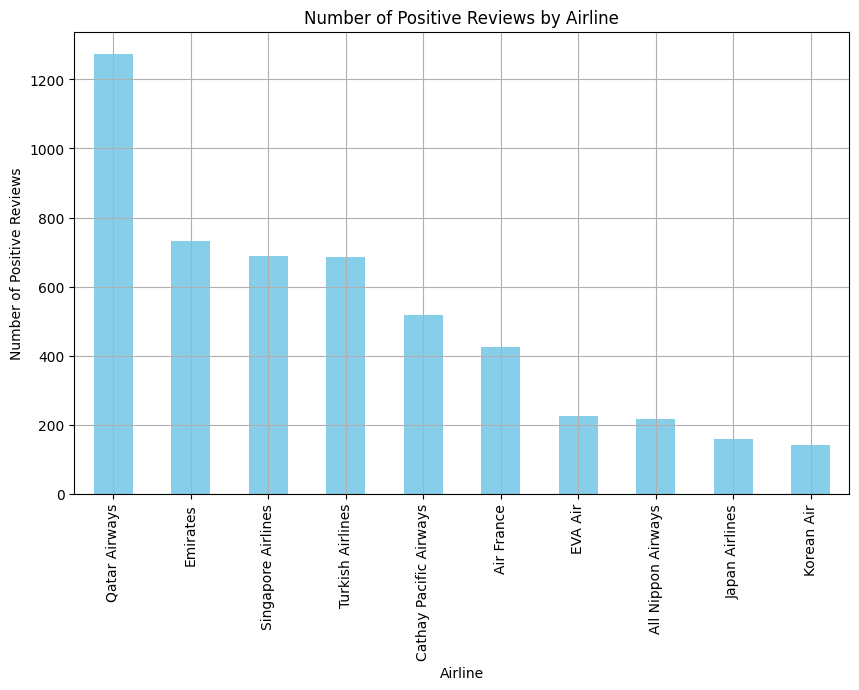

In [17]:
# Function to calculate the sentiment score
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Assuming you have already defined analyzer

df['Sentiment score'] = df['Reviews'].apply(get_sentiment_score)

positive_threshold = 0.05
df['Positive'] = df['Sentiment score'] > positive_threshold

# Filter the DataFrame to include only positive reviews and then count occurrences for each airline
positive_airlines_count = df[df['Positive']]['Airline'].value_counts()

plt.figure(figsize=(10, 6))
positive_airlines_count.plot(kind='bar', color='skyblue')
plt.title('Number of Positive Reviews by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Positive Reviews')
plt.grid(True)
plt.show()


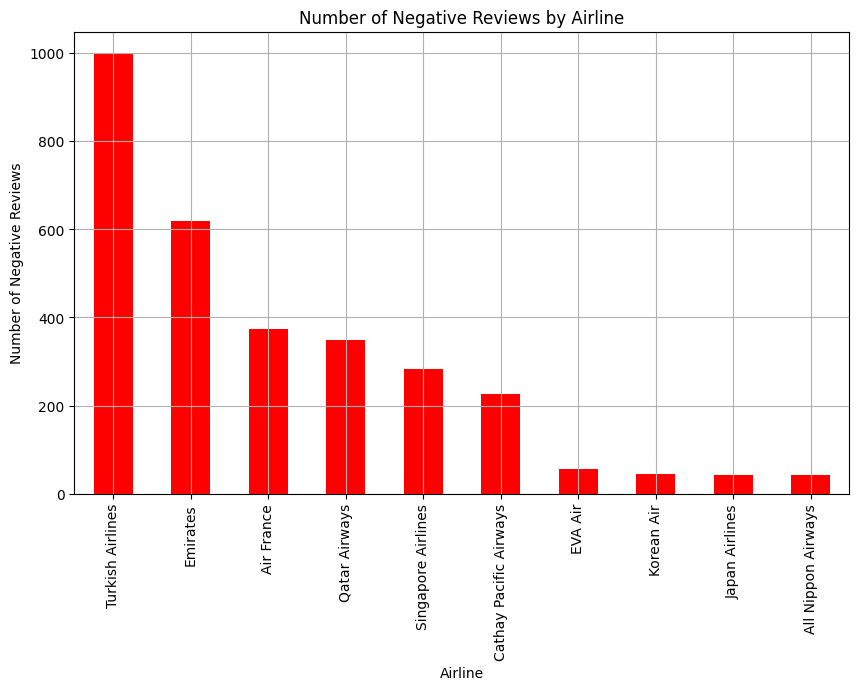

In [18]:
# Function to calculate the sentiment score
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Assuming you have already defined analyzer

df['Sentiment score'] = df['Reviews'].apply(get_sentiment_score)

Negative_threshold = 0.05
df['Negative'] = df['Sentiment score'] < Negative_threshold

# Filter the DataFrame to include only positive reviews and then count occurrences for each airline
positive_airlines_count = df[df['Negative']]['Airline'].value_counts()

plt.figure(figsize=(10, 6))
positive_airlines_count.plot(kind='bar', color='red')
plt.title('Number of Negative Reviews by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Negative Reviews')
plt.grid(True)
plt.show()

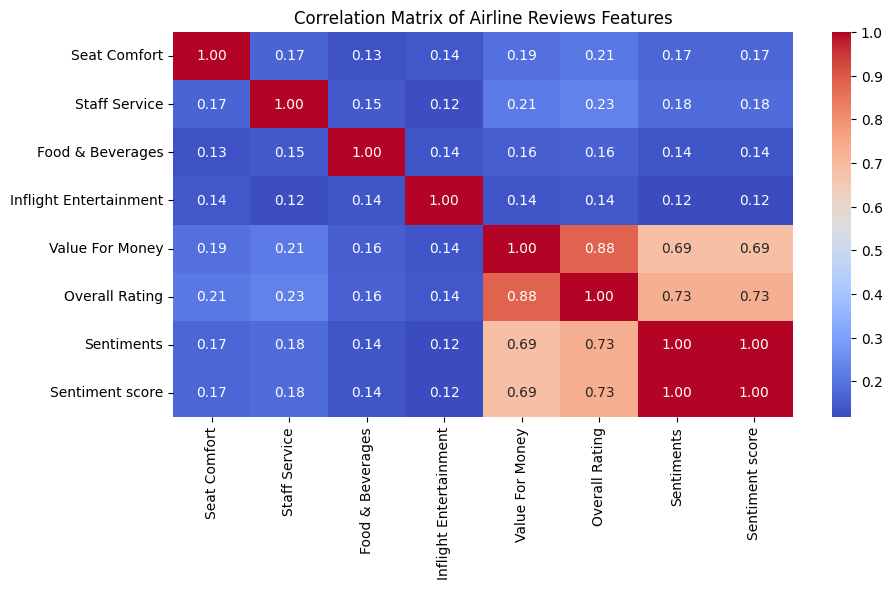

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Matrix of Airline Reviews Features')

# Show the plot
plt.show()

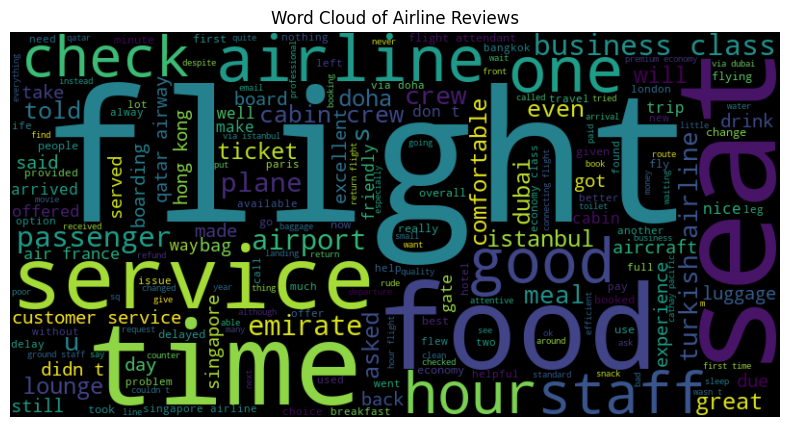

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ''.join(i for i in df['Reviews'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Airline Reviews")
plt.show()



In [23]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def create_pdf(filename):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter

    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 40, "Airline Reviews Analysis")

    # Add Word Cloud Image
    c.drawImage("output.png", 50, height - 300, width=500, height=250)

    # Add Sentiment Analysis Plot
    c.drawImage("sentiments_analysis.png", 50, height - 600, width=500, height=250)

    # Add Recommendations
    c.setFont("Helvetica", 12)
    c.drawString(100, height - 650, "Recommendations:")
    c.drawString(120, height - 670, "1. Improve service quality for airlines with high negative reviews.")
    c.drawString(120, height - 690, "2. Enhance the in-flight experience based on common complaints.")

    c.save()

create_pdf("Airline_Reviews_Analysis.pdf")
